In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import matplotlib.pyplot as plt
import seaborn as sns
import hddm
import numpy as np
from sys import platform
import os
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=2)

In [14]:
if platform == 'linux2':
    home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
elif platform == 'darwin':
    home = '/Users/i_67981492/dynamic_decision_policy_reconfiguration/'

print(platform, home)

write_dir = os.path.join(home, 'analysis_revision/loki0_stim_avtz_dc_models'); print(write_dir)

os.path.isdir(write_dir)

all_obs_data = hddm.load_csv(os.path.join(home, 'aggregated_data/loki_0/av_est_fix.csv'))
all_obs_data_pared = all_obs_data.loc[(all_obs_data.shifted_epoch_trial <= 3) &
                                      (all_obs_data.shifted_epoch_trial >=-1)]

all_obs_data_pared.groupby('condition').p_optimal.unique()

all_obs_data_pared.groupby('condition').lambda_val.unique()


all_obs_data_pared.columns = all_obs_data_pared.columns.str.strip()
all_obs_data_pared.head()


all_obs_data_pared["shifted_epoch_trial"] = all_obs_data_pared["shifted_epoch_trial"].astype('category')


('linux2', '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/')
/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/loki0_stim_avtz_dc_models


In [15]:
all_obs_data_pared.columns

Index([u'subj_id', u'experiment', u'condition', u'trial',
       u'shifted_epoch_trial', u'cp_with_slow_fast', u'obs_cp_with_slow_fast',
       u'p_id_accuracy', u'rt', u'lr_choice', u'lr_solution', u'cue_choice',
       u'high_p_cue', u'low_p_cue', u'high_val_cue', u'low_val_cue',
       u'obs_accuracy', u'reward', u'cumulative_reward', u'iti',
       u'total_trial_time', u'epoch_number', u'epoch_trial', u'n_epoch_trials',
       u'prop_112', u'cpp', u'ideal_B', u'target_B', u'v_est', u'a_est',
       u'a_est_z', u'v_est_z', u'lambda_val', u'p_optimal',
       u'epoch_window_number', u'r_z', u'theta_radians_z', u'theta_deg_z'],
      dtype='object')

In [4]:
all_obs_data_pared.head()

,subj_id,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,v_est,a_est,a_est_z,v_est_z,lambda_val,p_optimal,epoch_window_number,r_z,theta_radians_z,theta_deg_z
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,NaN,NaN,NaN,NaN,25.0,0.65,1.0,NaN,NaN,NaN
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,0.489341,1.036777,0.045557,-0.662807,25.0,0.65,1.0,NaN,NaN,NaN
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,-0.010970,1.039001,0.437093,-1.736615,25.0,0.65,1.0,1.142962,-1.221153,-69.966931
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,0.249152,1.039416,0.510081,-1.178319,25.0,0.65,1.0,0.563046,1.440801,82.551819
9,761,conflict,hc,35,-1,0.0,0.0,0,0.519362,1.0,...,0.984981,1.037269,0.132178,0.400975,25.0,0.65,2.0,NaN,NaN,NaN


In [5]:
all_obs_data.columns

Index([u'subj_id', u'experiment', u'condition', u'trial',
       u'shifted_epoch_trial', u'cp_with_slow_fast', u'obs_cp_with_slow_fast',
       u'p_id_accuracy', u'rt', u'lr_choice', u'lr_solution', u'cue_choice',
       u'high_p_cue', u'low_p_cue', u'high_val_cue', u'low_val_cue',
       u'obs_accuracy', u'reward', u'cumulative_reward', u'iti',
       u'total_trial_time', u'epoch_number', u'epoch_trial', u'n_epoch_trials',
       u'prop_112', u'cpp', u'ideal_B', u'target_B', u'v_est', u'a_est',
       u'a_est_z', u'v_est_z', u'lambda_val', u'p_optimal',
       u'epoch_window_number', u'r_z', u'theta_radians_z', u'theta_deg_z'],
      dtype='object')

In [6]:
all_obs_data_pared.rename(index=str, columns={"p_id_accuracy": "response",
                                                        "subj_id": "subj_idx"}, inplace=True)


included_acc_params_input = ['a', 'v', 't', 'z']


all_obs_data_pared['cpp_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).cpp.apply(lambda x: x.shift(1))
all_obs_data_pared['ideal_B_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).ideal_B.apply(lambda x: x.shift(1))

In [9]:
# all_obs_data_pared = all_obs_data_pared[['response', 'rt', 'experiment',
#                                                    'cpp_shifted', 'ideal_B_shifted', 
#                              'subj_idx', 'shifted_epoch_trial']].dropna()
all_obs_data_pared = all_obs_data_pared[['response', 'rt', 'experiment',
                                                   'cpp', 'ideal_B', 
                             'subj_idx', 'shifted_epoch_trial']].dropna()

# n_samples, n_burned_samples, n_thin = 20000, 5000, 5
n_samples, n_burned_samples, n_thin = 5000, 1000, 1

p_outlier = 0.05
# n_samples, n_burned_samples, n_thin = 50, 5, 2 # min. samples to test the workflow

# Estimate regression models

In [10]:
#intercept model
intercept_model=['a~1', 'v~1'] #true intercept only; "flat", no predictors, but all parameters estimated (all parameters estimated in other reg. models, so only diff. is lack of predictors)
intercept_model = hddm.HDDMRegressor(all_obs_data_pared, intercept_model, bias=True, keep_regressor_trace=True, include=included_acc_params_input)
intercept_model.find_starting_values()
intercept_model.sample(n_samples, burn=n_burned_samples, thin=n_thin,  dbname='intercept_reg_data_subset.db',db='pickle')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept']


/home/kbond/.conda/envs/hddm_outside_slurm/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/kbond/.conda/envs/hddm_outside_slurm/lib/python2.7/site-packages/scipy/optimize/optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


 [-----------------100%-----------------] 5001 of 5000 complete in 12337.3 sec

In [11]:
# hyp model
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data_pared,['a~cpp', 'v~ideal_B'],bias=True, include=included_acc_params_input)
a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin,  dbname='a_cpp_v_B_data_subset.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['v_Intercept', 'v_ideal_B']
 [-----------------100%-----------------] 5001 of 5000 complete in 10012.5 sec

In [12]:
# inverted hyp model

v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data_pared,['v~cpp', 'a~ideal_B'],bias=True, include=included_acc_params_input)
v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, thin=n_thin,  dbname='v_cpp_a_B_data_subset.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['a_Intercept', 'a_ideal_B']
 [-----------------100%-----------------] 5001 of 5000 complete in 11556.5 sec

# Posteriors (convergence?)


In [64]:
write_dir = os.path.join(home, 'analysis_revision/evoked_response_reg_models'); print(write_dir)

/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/evoked_response_reg_models


In [65]:
models = [a_cpp_v_B_obs_reg, v_cpp_a_B_obs_reg, intercept_model]

cpp_shifted~a & ideal_B_shifted~v
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp_shifted
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_ideal_B_shifted
cpp_shifted~v & ideal_B_shifted~a
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_cpp_shifted
Plotting a_Intercept
Plotting a_Intercept_std


/home/kbond/.conda/envs/hddm_0.6/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting a_ideal_B_shifted
1~a & 1~v
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting v_Intercept
Plotting v_Intercept_std


<Figure size 432x288 with 0 Axes>

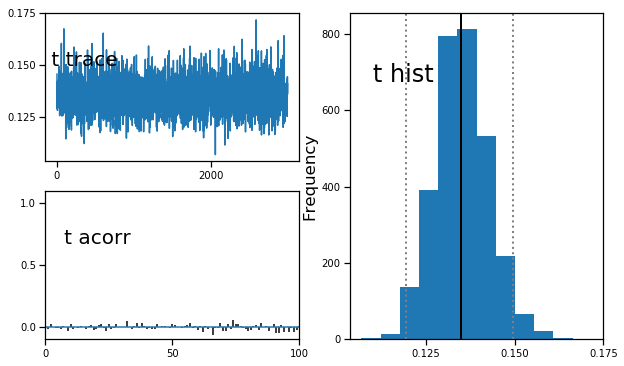

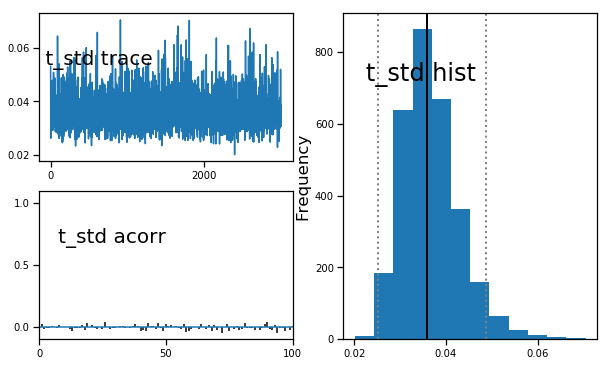

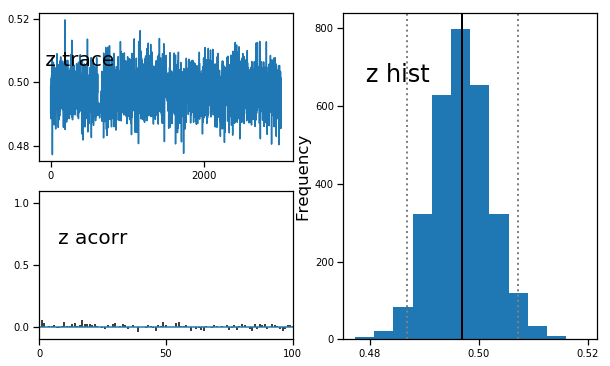

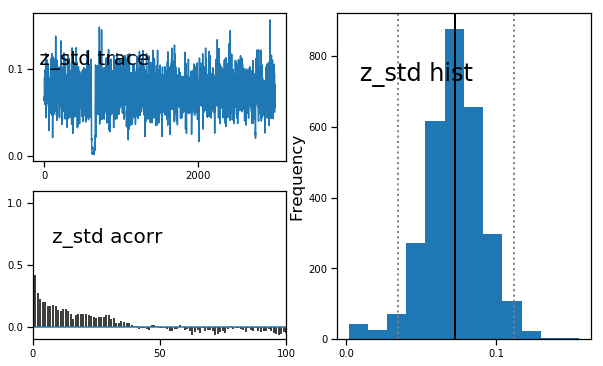

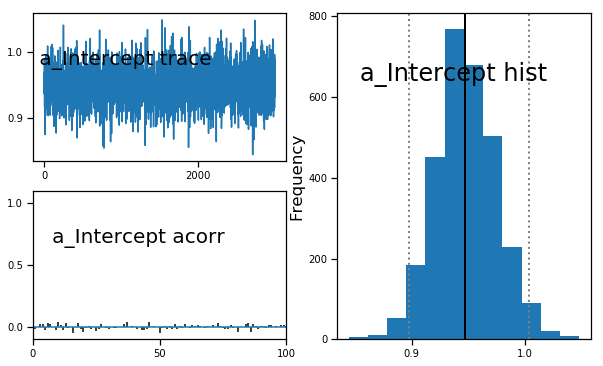

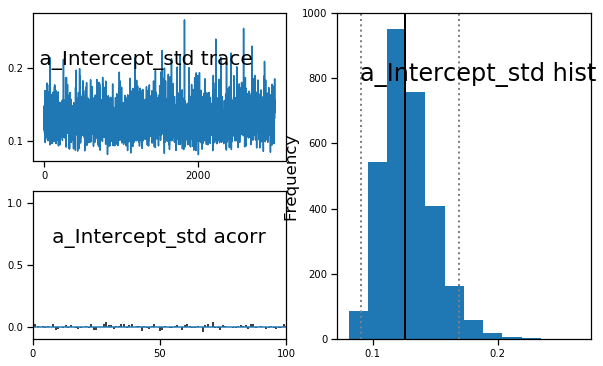

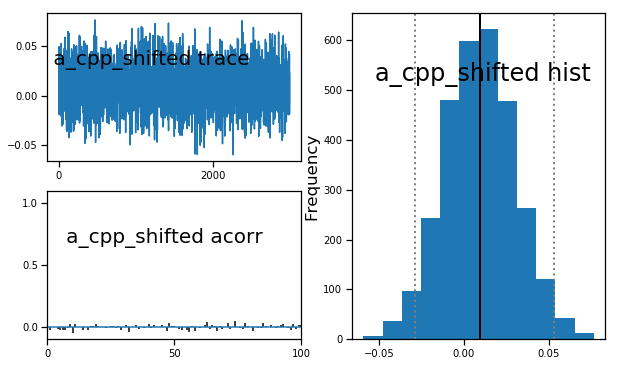

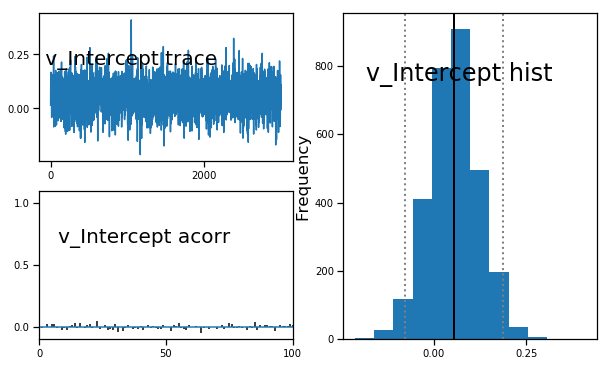

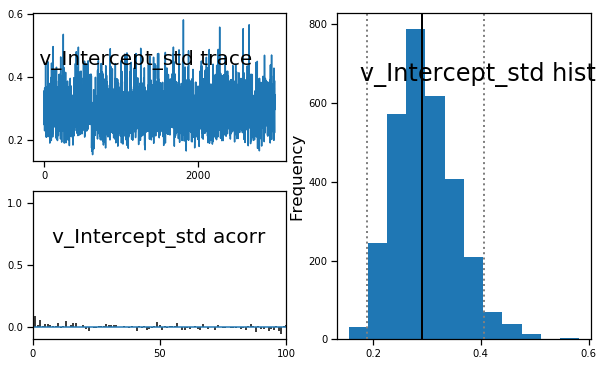

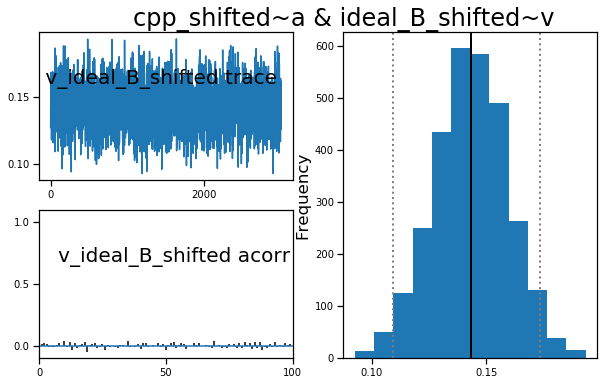

<Figure size 432x288 with 0 Axes>

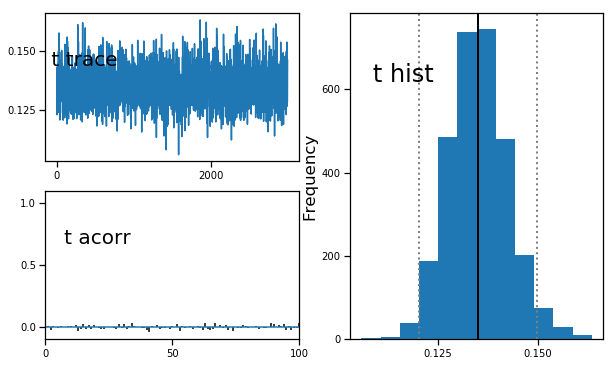

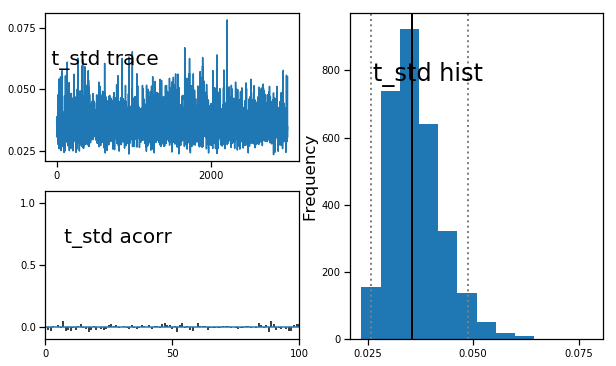

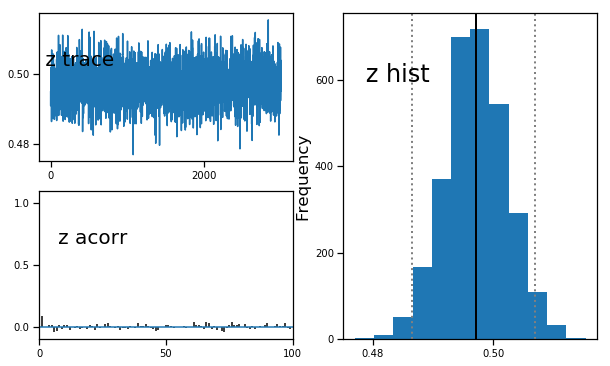

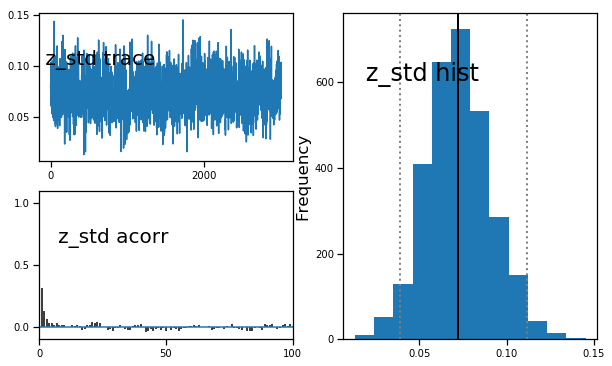

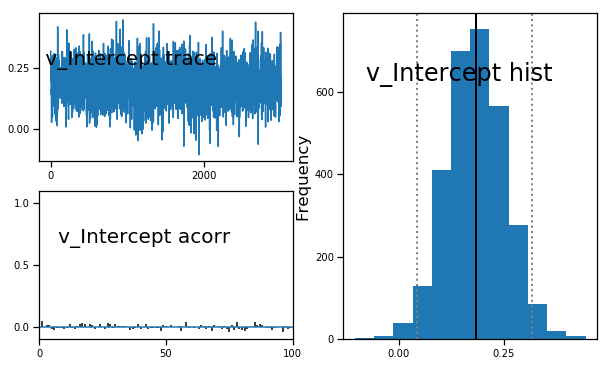

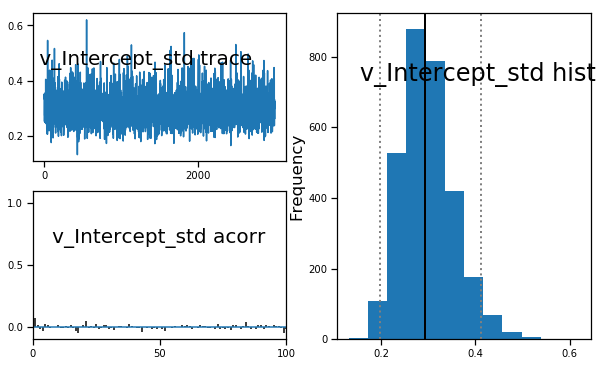

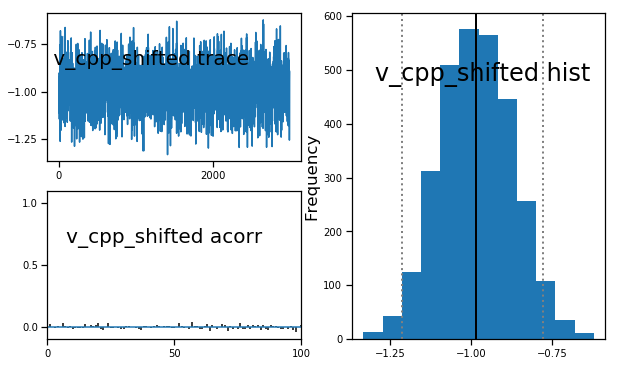

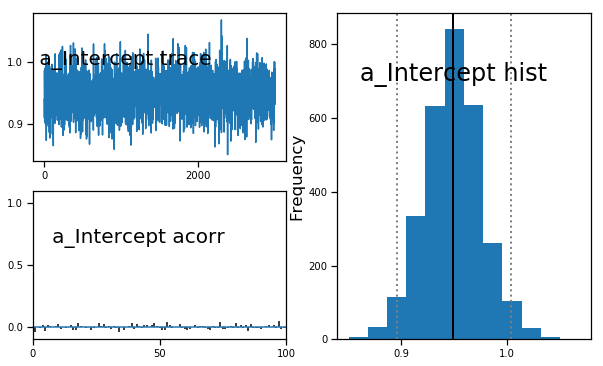

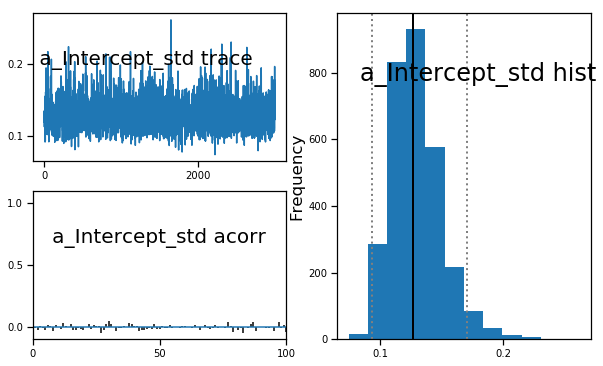

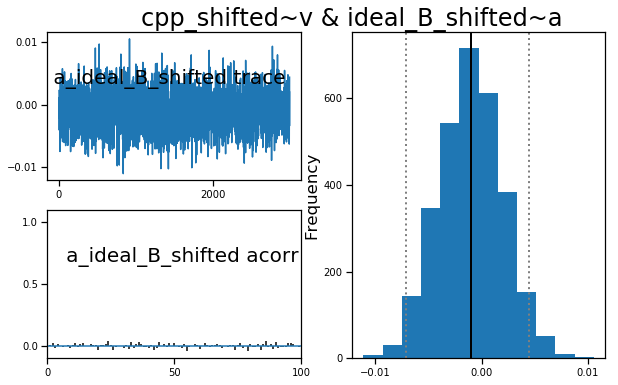

<Figure size 432x288 with 0 Axes>

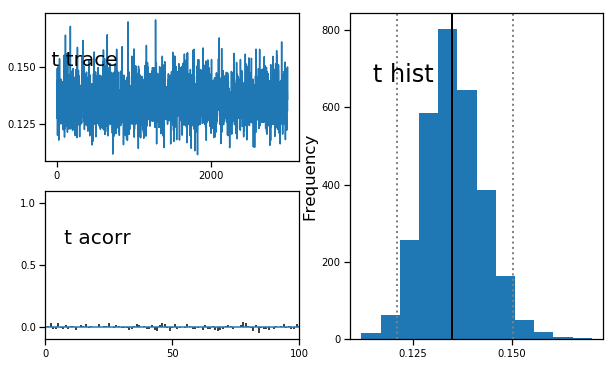

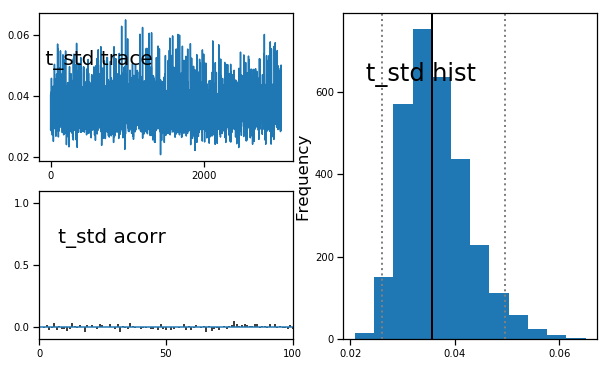

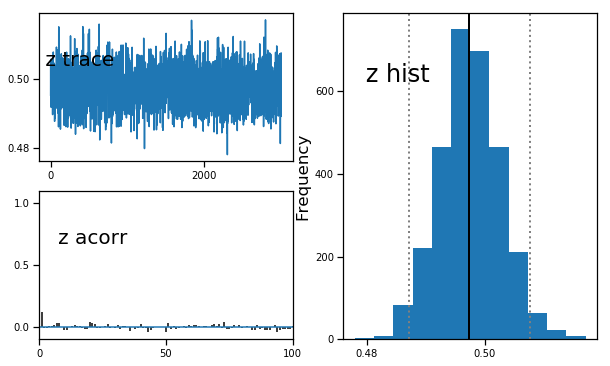

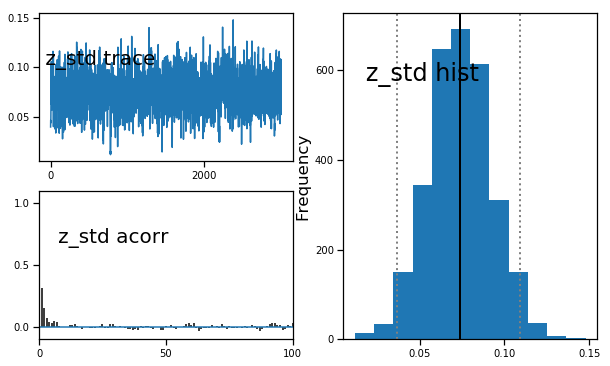

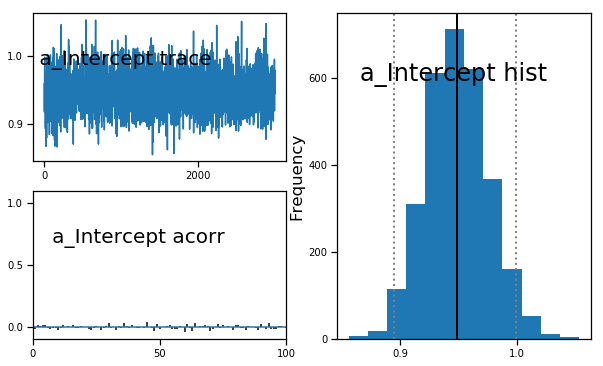

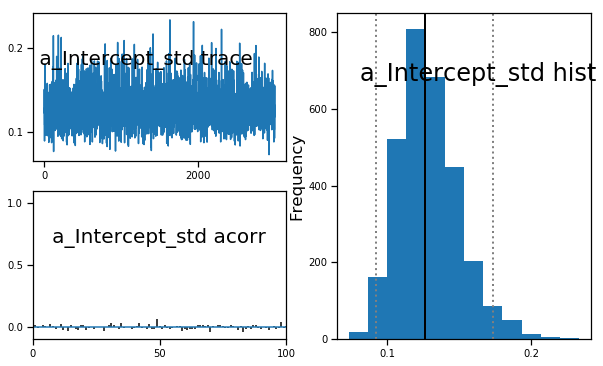

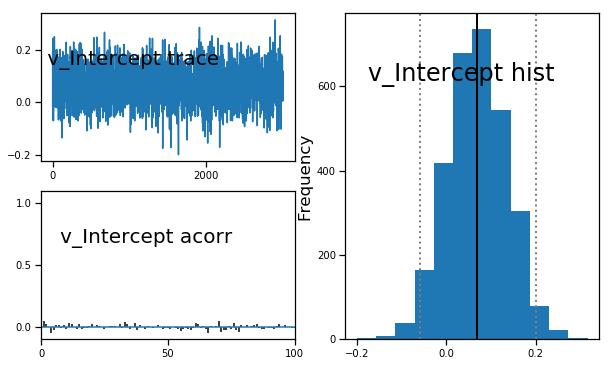

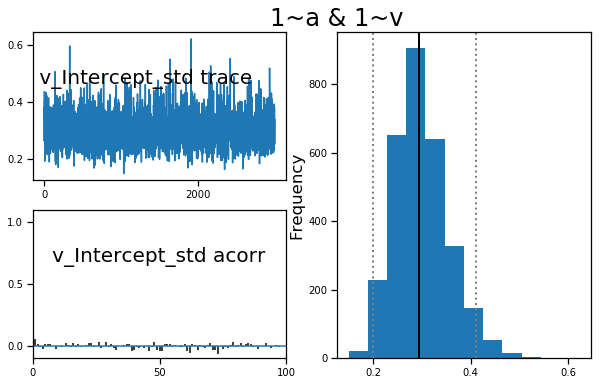

In [66]:

for m in models:

    n_free_parameters = len(m.model_descrs)

    assert n_free_parameters == 2, 'check model desc.'

    
    model_descs = [m.model_descrs[i]['model'] + '~' + m.model_descrs[i]['outcome'] for i in range(n_free_parameters)]
    
    
    model_descs_fmt = ' & '.join(model_descs)

    print(model_descs_fmt)
    
    # plot posteriors to assess convergence
    plt.figure()
    m.plot_posteriors(save=True)
    plt.title(model_descs_fmt)


# DICs (model fit?)


In [67]:
# save dics

model_dic_list = []
null_dic_dict = {'model': 'null'}
null_dic_dict.update(intercept_model.dic_info) 


for m in models: 
    

    n_free_parameters = len(m.model_descrs)

    assert n_free_parameters == 2, 'check model desc.'
    
   
    model_descs = [m.model_descrs[i]['model'] + '~' + m.model_descrs[i]['outcome'] for i in range(n_free_parameters)]
    
    
    model_descs_fmt = ' & '.join(model_descs)

    print(model_descs_fmt)

    temp_dict = {'model': model_descs_fmt}
    temp_dict.update(m.dic_info)

    temp_dict['null_adj_DIC'] = null_dic_dict['DIC'] - temp_dict['DIC']

    model_dic_list.append(temp_dict)


dic_df = pd.DataFrame(model_dic_list)
dic_df.to_csv(os.path.join(home, write_dir, '{}_dic_df.csv'.format('_data_subset_reg')), index=False)

cpp_shifted~a & ideal_B_shifted~v
cpp_shifted~v & ideal_B_shifted~a
1~a & 1~v


In [68]:
dic_df

,DIC,deviance,model,null_adj_DIC,pD
0,-3371.288107,-3454.901151,cpp_shifted~a & ideal_B_shifted~v,69.655023,83.613045
1,-3374.857430,-3458.187914,cpp_shifted~v & ideal_B_shifted~a,73.224347,83.330483
2,-3301.633083,-3383.359838,1~a & 1~v,0.000000,81.726754


# Save posterior traces


In [69]:
for m in models:
    
    group_traces = m.get_group_traces()


    group_traces['mcmc_iteration'] = np.arange(len(group_traces))
    
    model_descs = [m.model_descrs[i]['model'] + '~' + m.model_descrs[i]['outcome'] for i in range(n_free_parameters)]
    
    
    model_descs_fmt = ' & '.join(model_descs)

    print(model_descs_fmt)


    group_traces.to_csv(os.path.join(home, write_dir,
                                                 model_descs_fmt + '_data_subset_reg_traces.csv'), index=False)


cpp_shifted~a & ideal_B_shifted~v
cpp_shifted~v & ideal_B_shifted~a
1~a & 1~v


# Plot & save decision parameter distributions

/home/kbond/.conda/envs/hddm_0.6/lib/python2.7/site-packages/seaborn/axisgrid.py:244: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

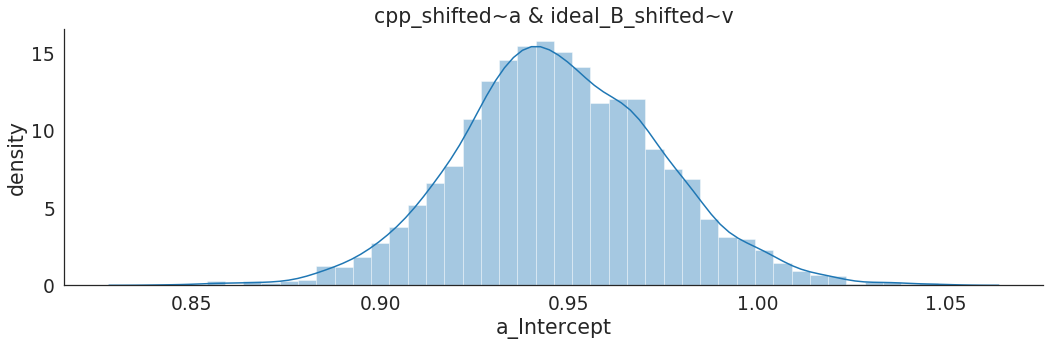

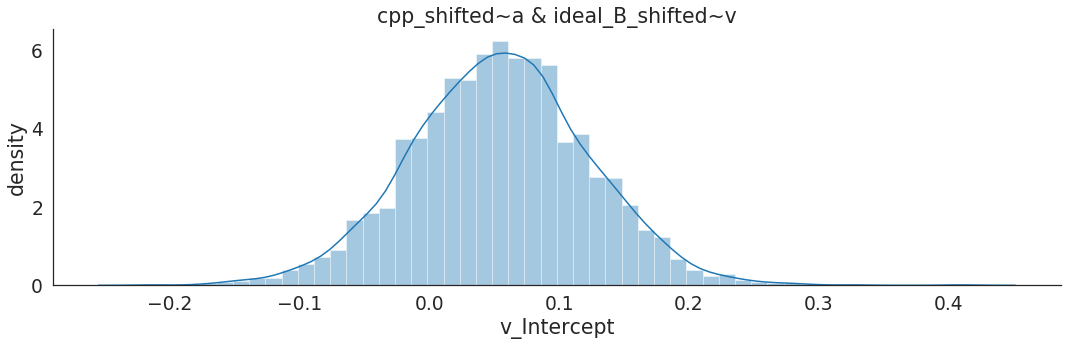

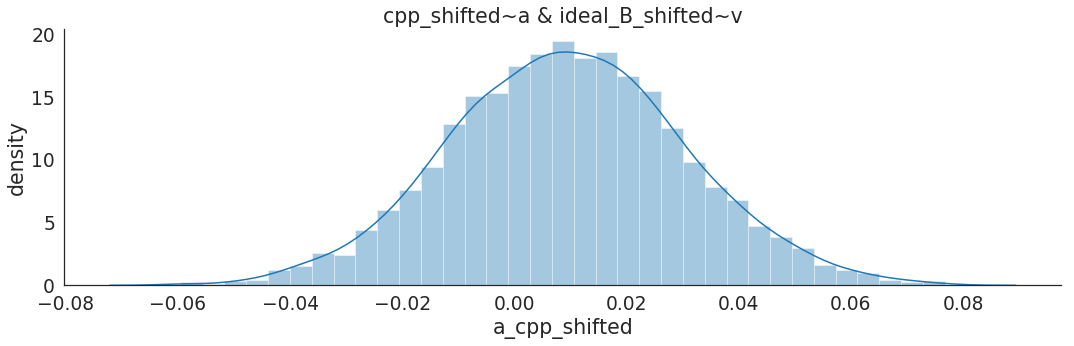

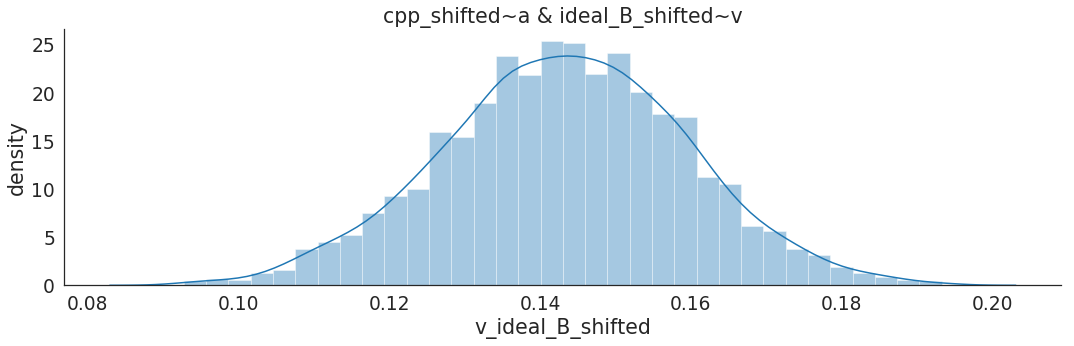

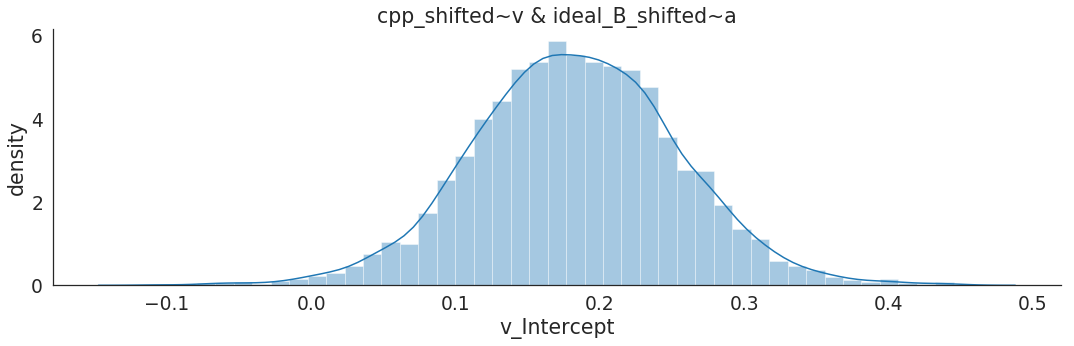

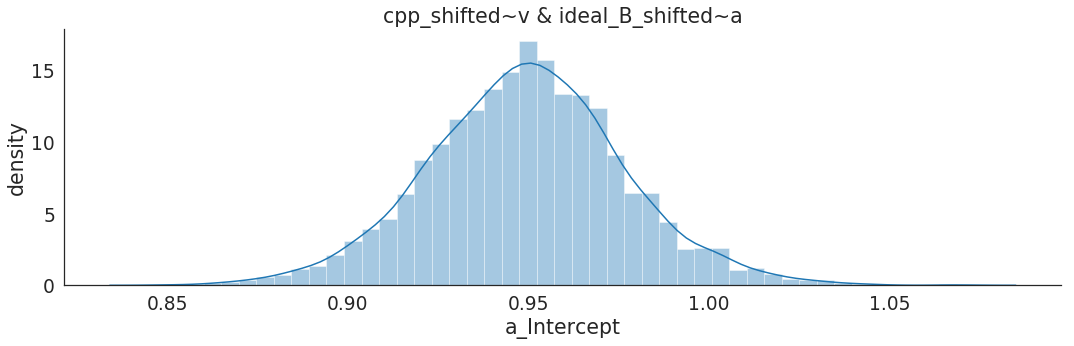

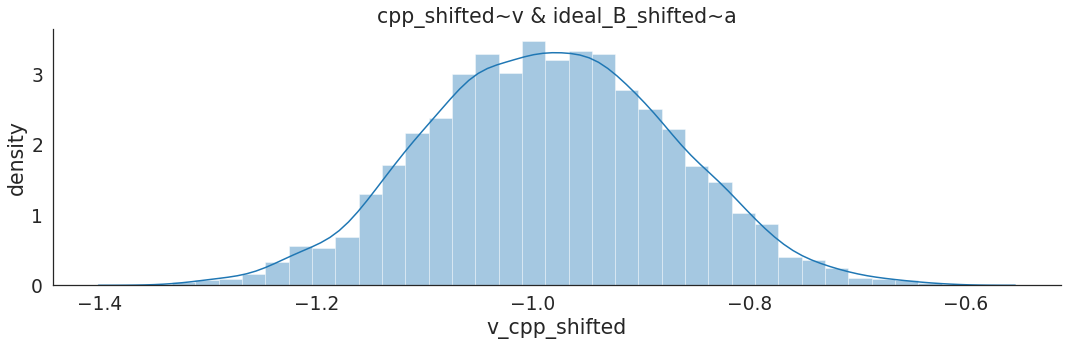

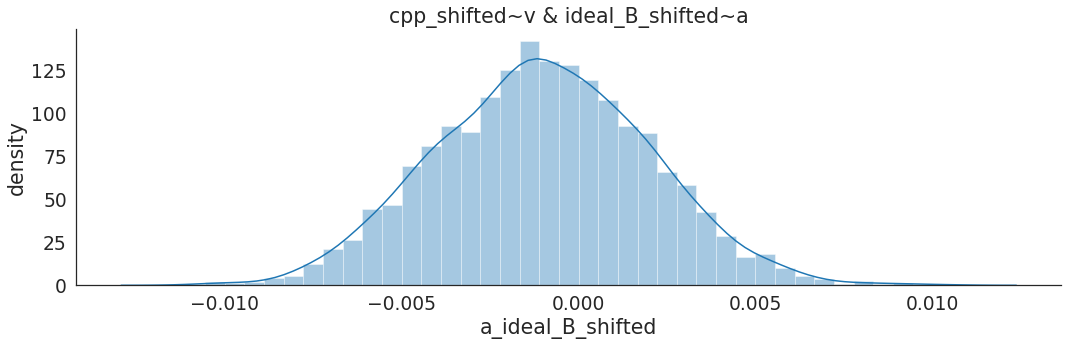

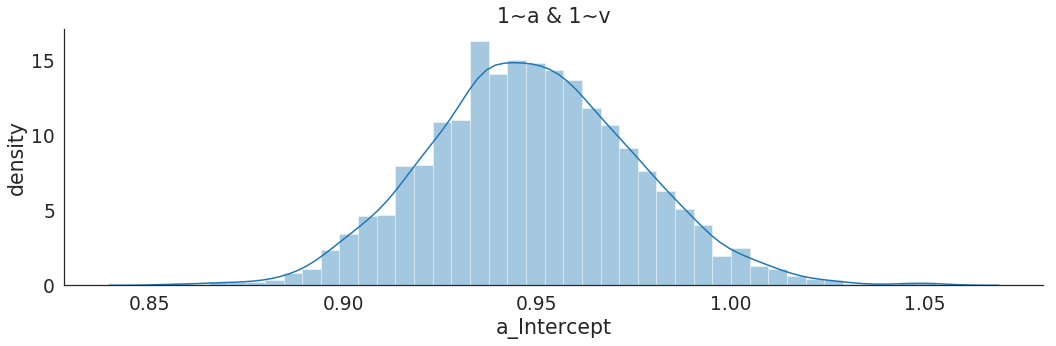

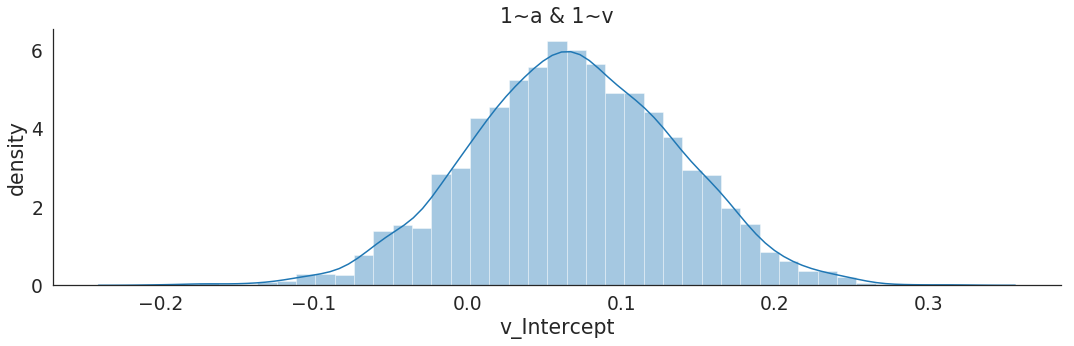

In [70]:
for m in models:
    
    
        model_descs = [m.model_descrs[i]['model'] + '~' + m.model_descrs[i]['outcome'] for i in range(n_free_parameters)]


        model_descs_fmt = ' & '.join(model_descs)


        n_free_parameters = len(m.model_descrs)

        assert n_free_parameters == 2, 'check model desc.'
            
        model_nodes = [m.model_descrs[i]['params'][0] for i in range(n_free_parameters)]
        
        if len(m.model_descrs[0]['params']) > 1: 
            other_model_nodes = [m.model_descrs[i]['params'][1] for i in range(n_free_parameters)]

            model_nodes = model_nodes + other_model_nodes
        
        
        model_node_traces = m.get_group_traces()[model_nodes]

        
        for n in model_nodes:

            sns.set_context("notebook", font_scale=1.7)
            sns.set_style('white')
            sns.despine()


            g = sns.FacetGrid(model_node_traces,
                              palette="Set1", size=5, aspect=3)

            g = (g.map(sns.distplot, n))
            plt.xlabel(n)
            plt.ylabel('density')
            plt.title(model_descs_fmt)

            g.savefig(os.path.join(home, write_dir, n + '_subset_reg_posterior_distributions.png'))